In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 1e-13# J


PAR.N_photens = 5
PAR.t0_i       = [1,0,0,0,0]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [1,1,1,1,1]  # Rms pulse duration / fs
PAR.E_i_abs    = [848,851,852,853,854] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (10,10,10,10,10)


PAR.I0_i =  [1* XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[2])*pulse_energy_J,
            1*XNLdyn.photons_per_J(PAR.E_i_abs[2])*pulse_energy_J,
            1*XNLdyn.photons_per_J(PAR.E_i_abs[2])*pulse_energy_J]

print(*zip(PAR.E_i_abs,PAR.I0_i))


(848, 736.0270134977316) (851, 733.4323236734152) (852, 732.5714876127656) (853, 732.5714876127656) (854, 732.5714876127656)


In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=False)#, load_tables = False

sim.par.I0_i

Energy 0.30 too close to others to satisfy the resonant bandwidth of 0.80
Energy 1.30 too close to others to satisfy the resonant bandwidth of 0.80
Energy 1.30 too close to others to satisfy the resonant bandwidth of 0.80
Energy 2.30 too close to others to satisfy the resonant bandwidth of 0.80
Energy 2.30 too close to others to satisfy the resonant bandwidth of 0.80
Energy 3.30 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:309: RuntimeWarning: overflow encountered in exp
  fermi_distr[calculatable] = 1 / (np.exp(energy_ratios[calculatable]) + 1)


[736.0270134977316,
 733.4323236734152,
 732.5714876127656,
 732.5714876127656,
 732.5714876127656]

<IPython.core.display.Javascript object>


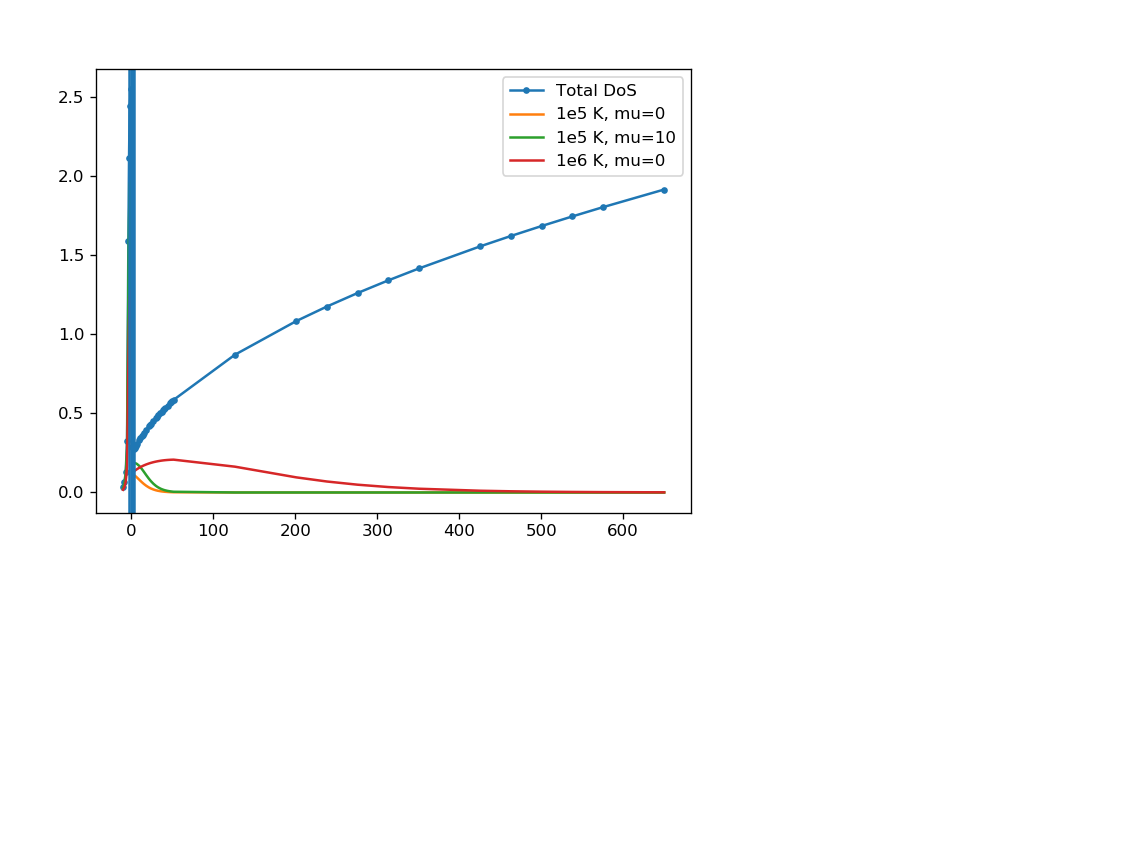

In [5]:
plt.figure()
plt.plot(PAR.E_j,PAR.m_j/PAR.enax_dE_j,'.-', label ='Total DoS')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,0)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=0')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,10)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=10')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6,0)*PAR.m_j/PAR.enax_dE_j, label = '1e6 K, mu=0')
plt.legend()
for ei in PAR.E_i:
    plt.axvline(ei)

In [6]:
PAR.m_j[PAR.resonant]

array([1.69079843, 1.11732836, 0.28777267, 0.28777267, 0.24462903])

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0167777730885064e-10
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.885868350370856e-09
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0739814371163448e-08
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4963403

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.931141693096606e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.614838621812666e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.748744892639877e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.923910753744764e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035706521655365364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004177151632793752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001015505883442902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009466840511183072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028826514864732644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028827269865838723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002883404128406486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002883879313257953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:5

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003829661130372308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003810844855729467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037603976410327533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003690846508868084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035076839236891644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003458187159528503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034358490819252907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000342377897253332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.879391222546163e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.875285810574674e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.87353081165071e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.90562763471467e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.789148730778019e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.783001085981319e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.782232986087908e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.780180068152261e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.259454645402926e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.253071800105483e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.221096157423919e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.215375548005111e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.63232191416069e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.626303262807e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.625232620838169e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.623894042532332e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.479244143563824e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.463534948429524e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.463539880988052e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.180398466439698e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

<IPython.core.display.Javascript object>


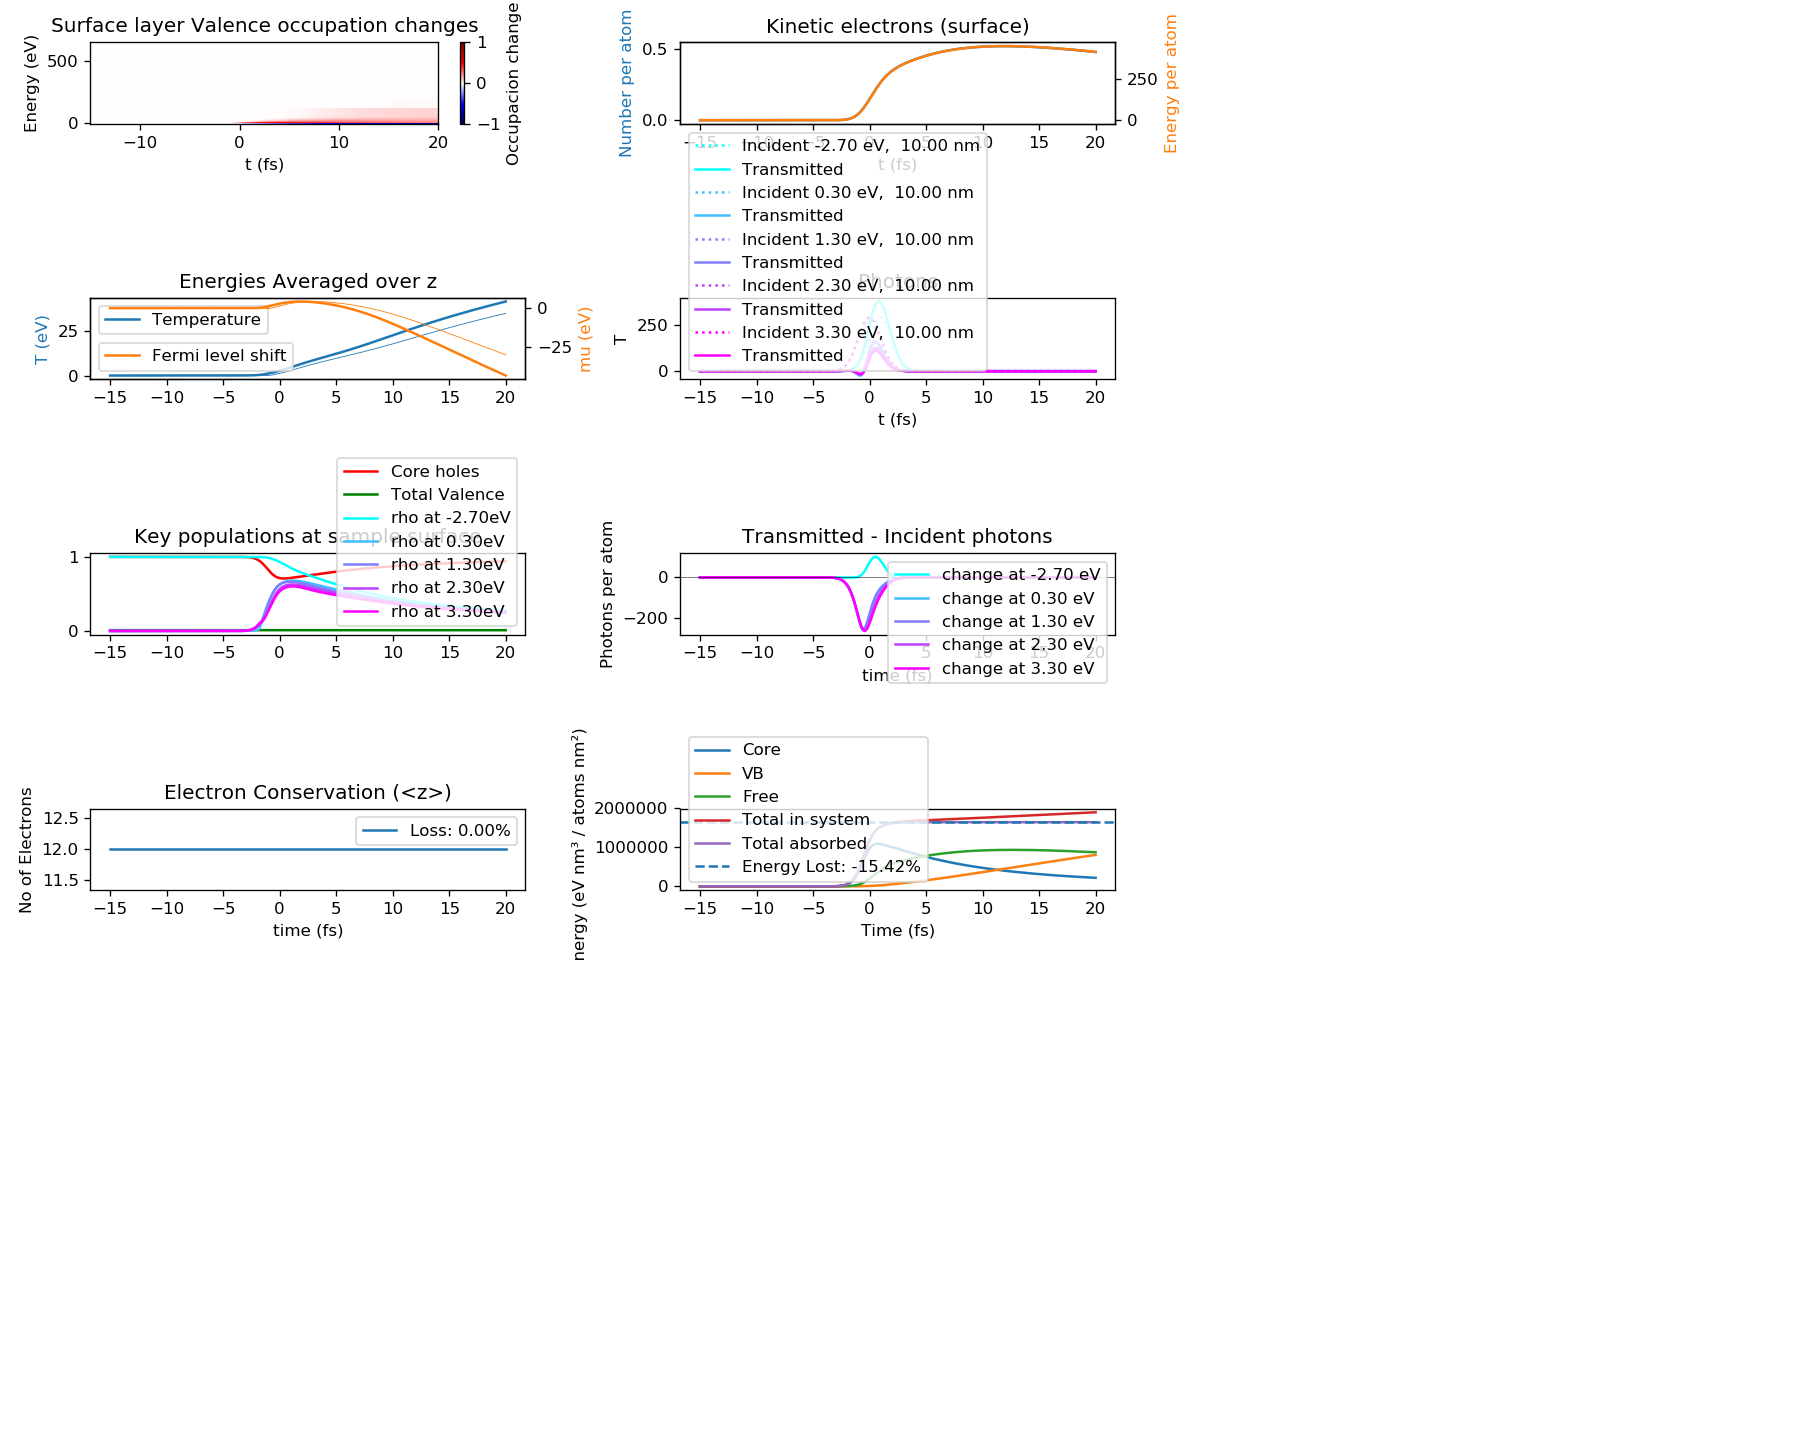

Done
Transmission:  [121.33348598  33.19055651  33.65172621  25.97878618  23.14240858]  %
CPU times: user 3.7 s, sys: 437 ms, total: 4.14 s
Wall time: 3.66 s


In [6]:
%%time
sim_options = dict(t_span=[-15, 20],
                   method='RK45',
                   rtol=1e-10, atol=1e-8, 
                   plot = True,
                   return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


<IPython.core.display.Javascript object>


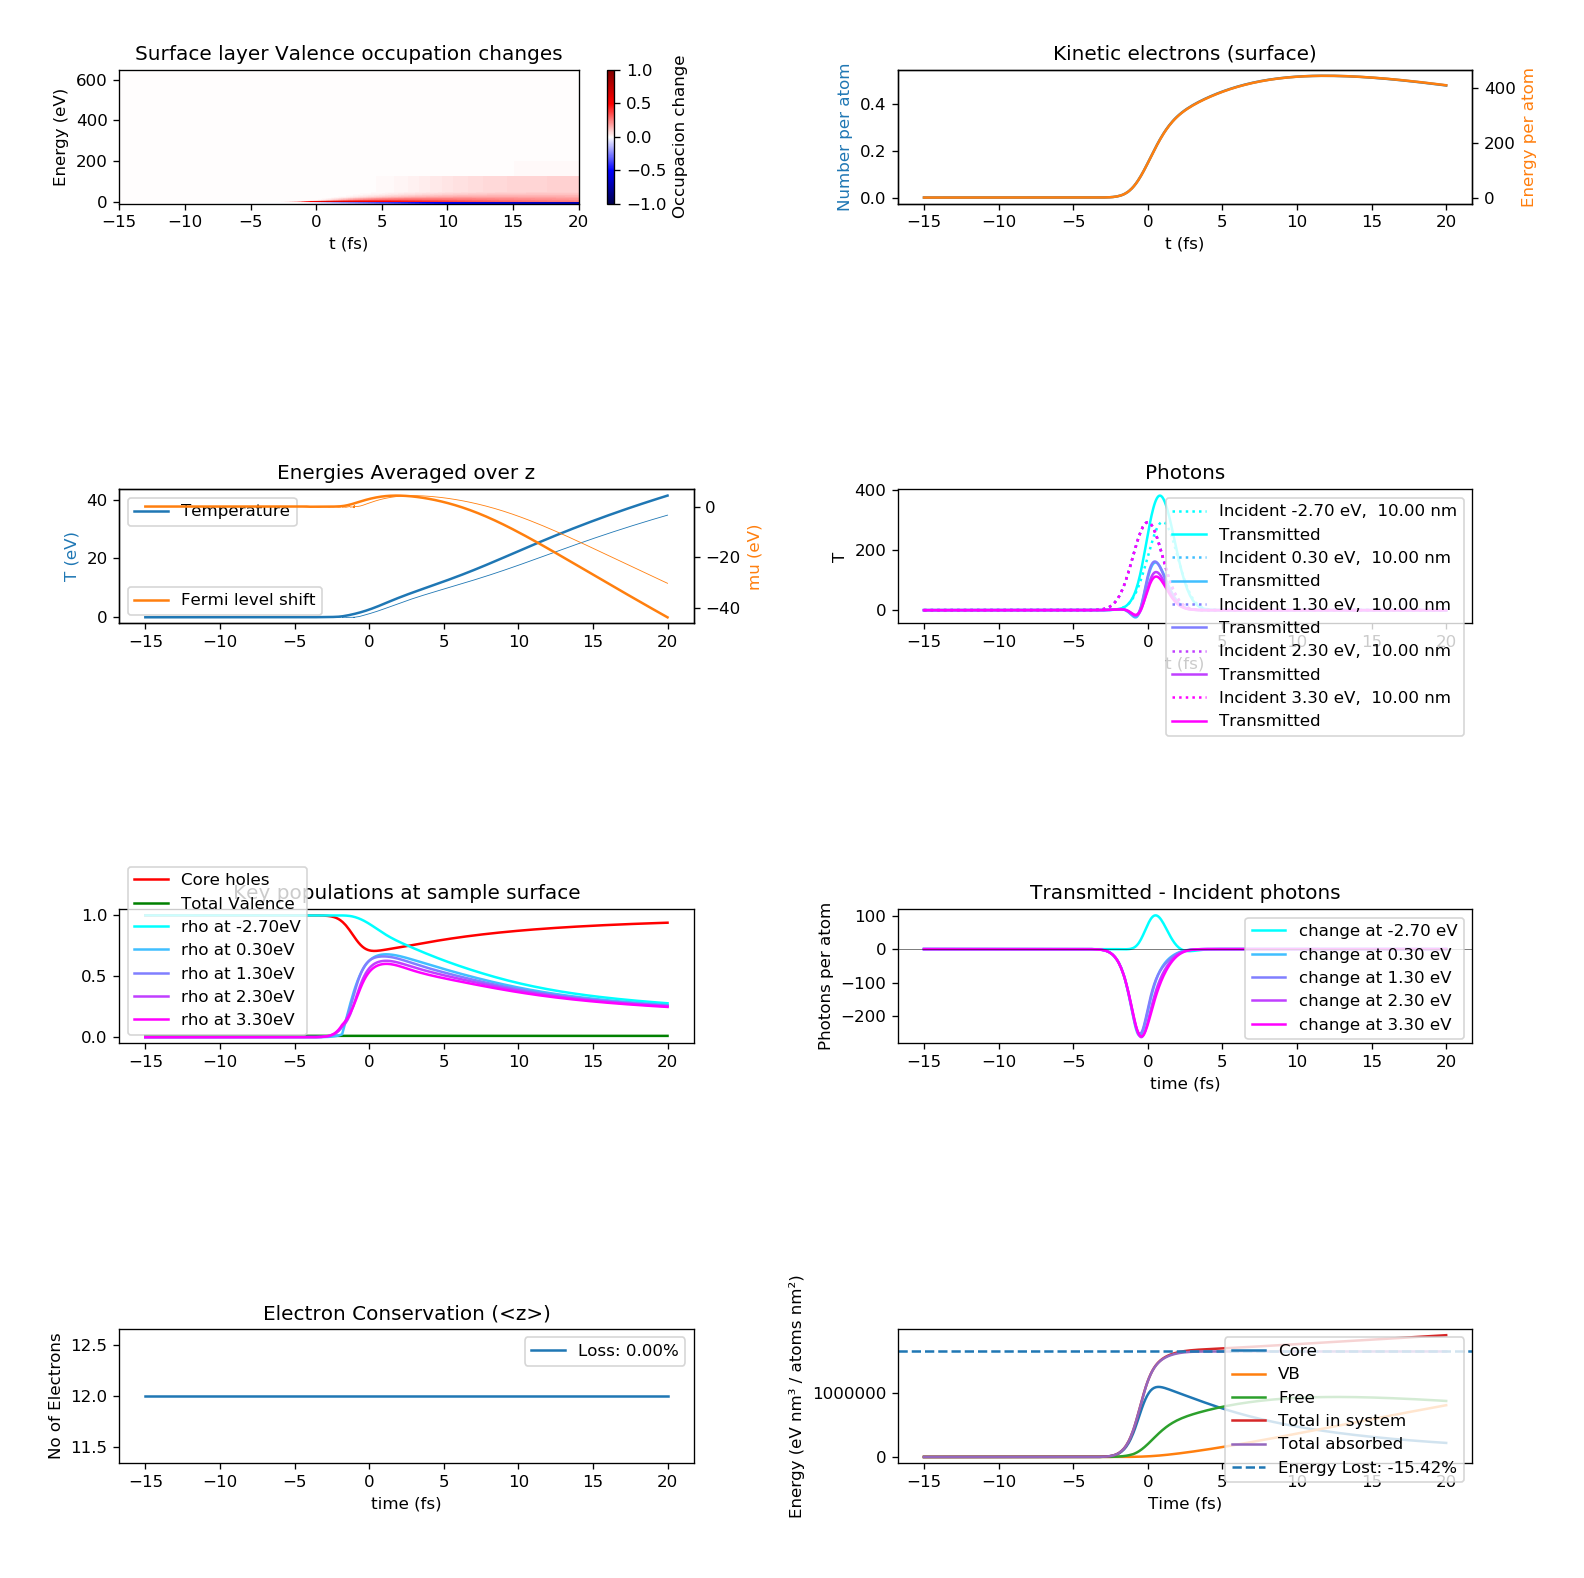

Done


In [7]:

sim.plot_results(sol, sol.photon_densities)

### Calculate inner energies and temperatures in the VB

In [8]:
self = sim
inner_energies = np.zeros((len(sol.t),self.par.Nsteps_z))
for it, t in enumerate(sol.t):
    for iz in range(self.par.Nsteps_z):
        U = np.sum(sol.rho_j[iz, :, it] * self.par.E_j)
        R = sol.R_VB[iz, it]
        T, mu_chem = self.par.FermiSolver.solve(U, R)
        if np.isnan(T):
            T, mu_chem = self.par.FermiSolver.save_lookup_Tmu_from_UR(U, R)
        # if self.DEBUG and (iz==0):
        #    print(U,R,'->',T, mu_chem)
        sol.temperatures[it, iz], sol.chemical_potentials[it, iz] = (T, mu_chem)
        inner_energies[it,iz] = U # This is needed later to check the energy conservation

### Calculate Total energy in the stack

In [11]:

## Integrat energy for each timestepsol.chemical_potentials+
absorbed_energy_dt = np.sum((sol.photon_densities[0]-sol.photon_densities[-1]).T*(self.par.E_i+self.par.E_f),1)
absorbed_energy = np.array([np.trapz(absorbed_energy_dt[:i+1],sol.t[:i+1]) for i in range(len(absorbed_energy_dt))])

factor = self.par.atomic_density * self.par.zstepsize # From energy per atom to energy per nm²
total_free = np.sum(sol.E_free[:,:],0) * factor#*1.01
#total_free_simple = np.sum(sol.R_free[:,:]*(self.par.E_f),0) * factor
total_inner = (np.sum(inner_energies[:,:],1)-np.sum(inner_energies[0,:])) * factor#*0.9
#total_inner = total_inner - total_inner[0]
total_core = np.sum((self.par.M_core- sol.core[:,:])*self.par.E_f,0) * factor#*1.13
#total_core = np.sum(self.par.M_core * (self.par.M_core/sol.core[:,:])*self.par.E_f,0) * factor

total_energies = total_free + total_inner + total_core
#total_energies_simple = total_free_simple + total_inner + total_core


<IPython.core.display.Javascript object>


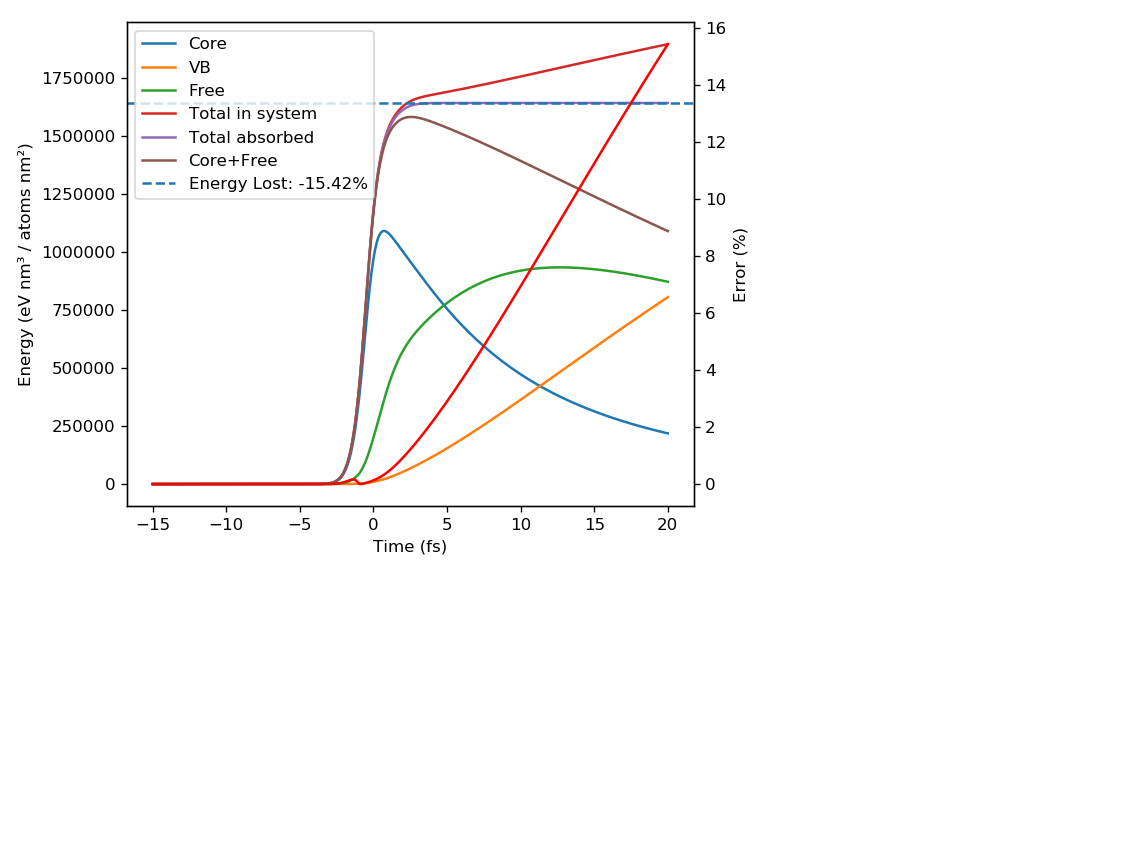

Done


In [13]:

plt.figure()
ax1 = plt.gca()
plt.plot(sol.t, total_core, label = 'Core')
plt.plot(sol.t, total_inner, label = 'VB')
plt.plot(sol.t, total_free, label = 'Free')
#plt.plot(sol.t, total_free_simple, label = 'Free simple')
plt.plot(sol.t, total_energies, label = 'Total in system')
#plt.plot(sol.t, total_energies_simple, label = 'Total in system simple')
plt.plot(sol.t, absorbed_energy, label = 'Total absorbed')

plt.plot(sol.t, total_free+total_core, label = 'Core+Free')



plt.axhline(absorbed_energy[-1], ls='--', label=f'Energy Lost: {100*(absorbed_energy[-1]-total_energies[-1])/absorbed_energy[-1]:.2f}%')
plt.legend()

plt.xlabel('Time (fs)')
plt.ylabel('Energy (eV nm³ / atoms nm²)')

ax2 = ax1.twinx()
err = np.abs(absorbed_energy-total_energies)/np.max(absorbed_energy)
#err[absorbed_energy< 1e-2*np.max(absorbed_energy)]=0
ax2.plot(sol.t, 100*err,  color='red')
ax2.set_ylabel('Error (%)')

plt.tight_layout()
plt.show()
#plt.pause(20)

print('Done')

### Calculate total energy z-resolved

In [15]:
absorbed_energy_dt_dz = np.zeros((PAR.zaxis.shape[0], len(sol.t)))
for i in range(PAR.zaxis.shape[0]):
    absorbed_energy_dt_dz[i] = np.sum((sol.photon_densities[i]-sol.photon_densities[i+1]).T*(self.par.E_i+self.par.E_f),1)
absorbed_energy_dz = np.array([np.trapz(absorbed_energy_dt_dz[:,:i+1],sol.t[:i+1],0) for i in range(absorbed_energy_dt_dz.shape[1])])


factor = self.par.atomic_density * self.par.zstepsize # From energy per atom to energy per nm²
total_free_dz = (sol.E_free[:,:] * factor).T

total_inner_dz = (inner_energies[:,:]-inner_energies[0,:]) * factor

total_core_dz = ((self.par.M_core- sol.core[:,:])*self.par.E_f * factor).T


total_energies_dz = total_free_dz + total_inner_dz + total_core_dz
#total_energies_simple = total_free_simple + total_inner + total_core

In [16]:
total_core_dz.shape

(218, 2)

<IPython.core.display.Javascript object>


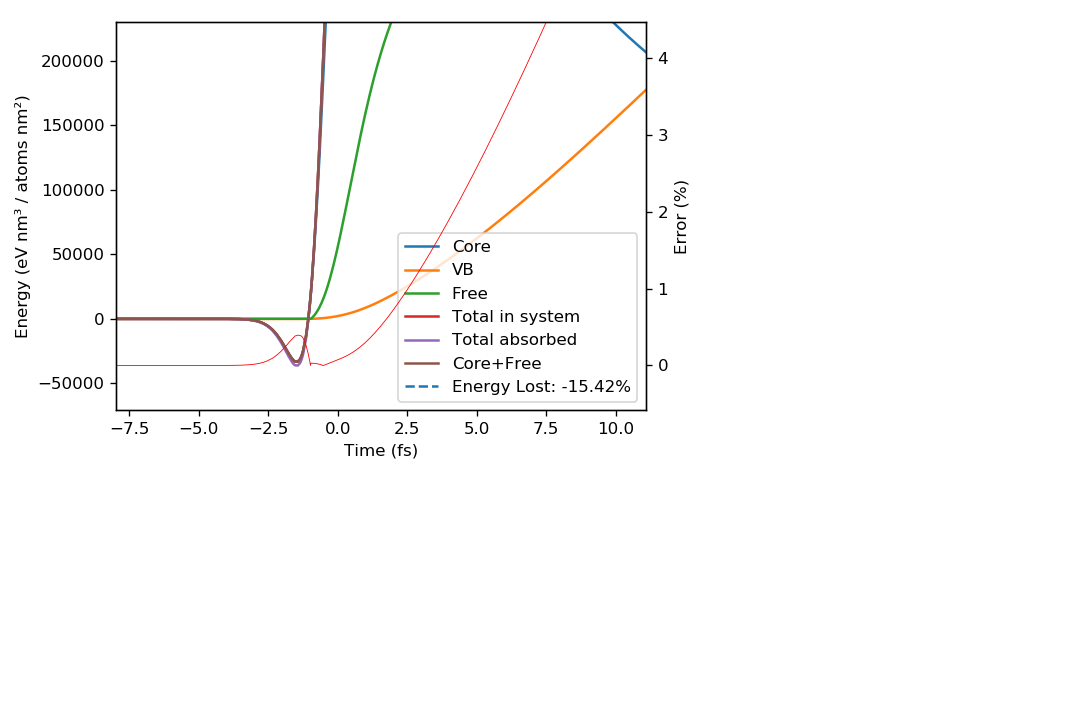

Done


In [18]:
plotz = np.s_[:,1]

plt.figure(figsize =(6,4))
ax1 = plt.gca()
plt.plot(sol.t, total_core_dz[plotz], label = 'Core')
plt.plot(sol.t, total_inner_dz[plotz], label = 'VB')
plt.plot(sol.t, total_free_dz[plotz], label = 'Free')
plt.plot(sol.t, total_energies_dz[plotz], label = 'Total in system')
plt.plot(sol.t, absorbed_energy_dz[plotz], label = 'Total absorbed')

plt.plot(sol.t, total_free_dz[plotz]+total_core_dz[plotz], label = 'Core+Free')



plt.axhline(absorbed_energy_dz[plotz][-1], ls='--', label=f'Energy Lost: {100*(absorbed_energy[-1]-total_energies[-1])/absorbed_energy[-1]:.2f}%')
plt.legend()

plt.xlabel('Time (fs)')
plt.ylabel('Energy (eV nm³ / atoms nm²)')

ax2 = ax1.twinx()
err = np.abs(absorbed_energy_dz[plotz]-total_energies_dz[plotz])/np.max(absorbed_energy_dz[plotz])
#err[absorbed_energy< 1e-2*np.max(absorbed_energy)]=0
ax2.plot(sol.t, 100*err,  lw=0.5,color='red')
ax2.set_ylabel('Error (%)')

plt.tight_layout()
plt.show()
#plt.pause(20)

print('Done')

In [12]:
### calculate rates

it = 50
t = sol.t[it]

all_changes = np.zeros((len(sol.t), PAR.Nsteps_z, PAR.states_per_voxel))

for it, t in enumerate(sol.t):
    photons = np.zeros((PAR.Nsteps_z, PAR.N_j))
    photons[:,PAR.resonant] = sol.photon_densities[:-1,:,it]
    states = sol.y[:,it].reshape(PAR.Nsteps_z, PAR.states_per_voxel)
    rj_z = np.zeros((PAR.Nsteps_z, PAR.N_j))
    for iz in range(PAR.Nsteps_z):
        rj_z[iz,:] = PAR.FermiSolver.fermi(sol.temperatures[it,iz], sol.chemical_potentials[it,iz]) * PAR.m_j
    res_inter, nonres_inter, ch_decay, el_therm, el_scatt, en_free = sim.calc_processes(photons , states, rj_z)

    all_changes[it,:, 0] = sim.rate_core(res_inter, ch_decay)
    all_changes[it,:, 1] = sim.rate_free(nonres_inter, ch_decay, el_scatt)
    all_changes[it,:, 2] = sim.rate_E_free(nonres_inter, ch_decay, el_scatt)
    all_changes[it,:, 3:] = sim.rate_j(res_inter,nonres_inter,ch_decay,el_therm,el_scatt)
    
core_changes = all_changes[:,:,0]
free_changes = all_changes[:,:,1]
efree_changes = all_changes[:,:,2]
j_changes = all_changes[:,:,3:]


Deviation from energy conservation (%):  29.383288833112974
Deviation from energy conservation (%):  0.0036108428198634943
Deviation from energy conservation (%):  4.656025189284645e-06
Deviation from energy conservation (%):  3.9317147413758157e-07
Deviation from energy conservation (%):  2.3518379026374788e-07
Deviation from energy conservation (%):  2.722857447373081e-08
Deviation from energy conservation (%):  1.1452827454356233e-08


In [13]:
def plot_conservations(self, sol):
    """
    Plot Energy and electron conservations. Call after plot_results()
    """
    PAR = self.par
    all_changes = np.zeros((len(sol.t), PAR.Nsteps_z, PAR.states_per_voxel))

    for it, t in enumerate(sol.t):
        photons = np.zeros((PAR.Nsteps_z, PAR.N_j))
        photons[:,PAR.resonant] = sol.photon_densities[:-1,:,it]
        states = sol.y[:,it].reshape(PAR.Nsteps_z, PAR.states_per_voxel)
        rj_z = np.zeros((PAR.Nsteps_z, PAR.N_j))
        for iz in range(PAR.Nsteps_z):
            rj_z[iz,:] = PAR.FermiSolver.fermi(sol.temperatures[it,iz], sol.chemical_potentials[it,iz]) * PAR.m_j
        res_inter, nonres_inter, ch_decay, el_therm, el_scatt, en_free = sim.calc_processes(photons , states, rj_z)

        all_changes[it,:, 0] = sim.rate_core(res_inter, ch_decay)
        all_changes[it,:, 1] = sim.rate_free(nonres_inter, ch_decay, el_scatt)
        all_changes[it,:, 2] = sim.rate_E_free(nonres_inter, ch_decay, el_scatt)
        all_changes[it,:, 3:] = sim.rate_j(res_inter,nonres_inter,ch_decay,el_therm,el_scatt)

    core_changes = all_changes[:,:,0]
    free_changes = all_changes[:,:,1]
    efree_changes = all_changes[:,:,2]
    j_changes = all_changes[:,:,3:]


In [14]:
U_changes = np.sum(j_changes*PAR.E_j,2) # this is just the derivative at each point
U_changes_actual = np.gradient(sol.inner_energies,sol.t, axis = 0)# This is the actual change, which is different due to RK45

<IPython.core.display.Javascript object>


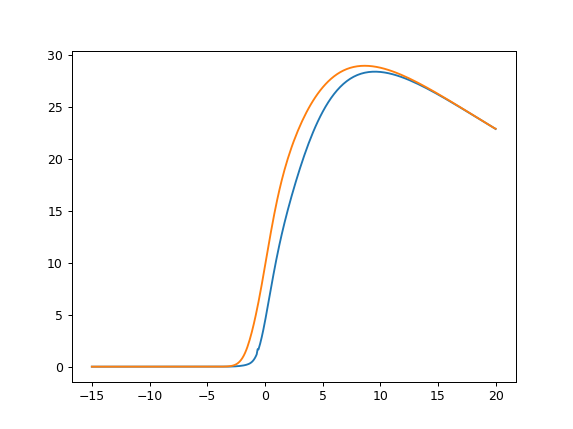

In [15]:
plt.figure()
#plt.plot(sol.t,core_changes[:,0])
#plt.plot(sol.t,free_changes[:,0])
plt.plot(sol.t,U_changes[:,0])
plt.plot(sol.t[:],U_changes_actual[:,0])

#plt.plot(sol.t,j_changes[:,0][:,PAR.resonant])

<IPython.core.display.Javascript object>


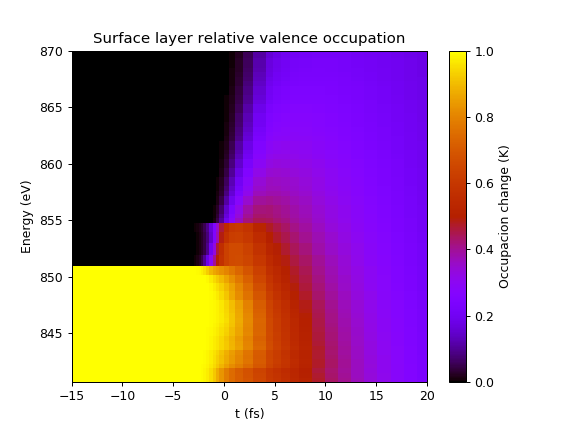

(840.7, 870)

In [21]:
plt.figure()
plt.pcolormesh(sol.t, PAR.E_j +PAR.E_f,
               (sol.rho_j[0])/np.outer(PAR.m_j,np.ones(sol.t.shape)),
               cmap = plt.cm.gnuplot, vmin = 0, vmax = 1, shading = 'nearest')#
plt.colorbar(label = 'Occupacion change (K)')
plt.xlabel('t (fs)')
plt.ylabel('Energy (eV)')
plt.title('Surface layer relative valence occupation')
plt.ylim(None, 870)

<IPython.core.display.Javascript object>


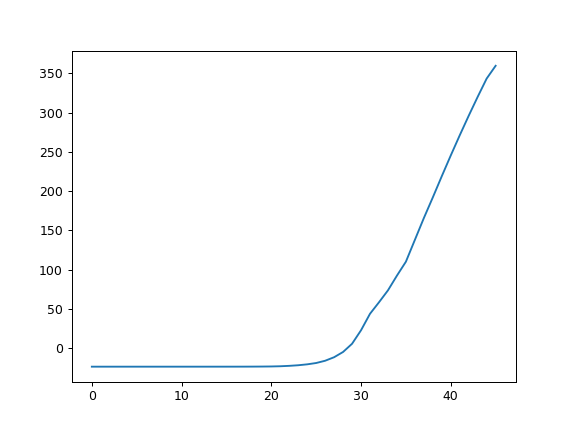

In [28]:
plt.figure()
plt.plot(sol.inner_energies[:,0])

<IPython.core.display.Javascript object>


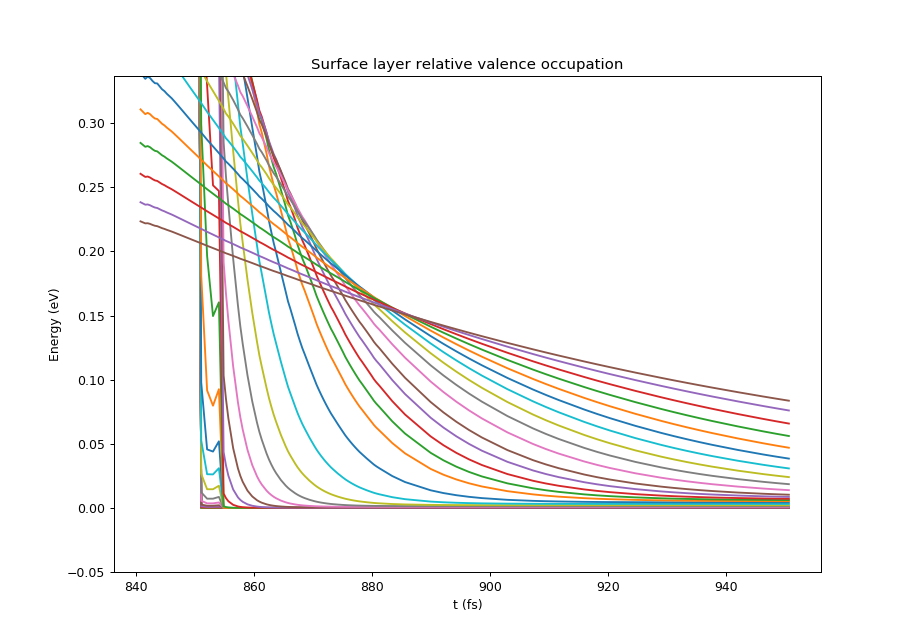

Text(0.5, 1.0, 'Surface layer relative valence occupation')

In [25]:
plt.figure()
plt.plot(PAR.E_j +PAR.E_f,
               (sol.rho_j[0])/np.outer(PAR.m_j,np.ones(sol.t.shape)))#
plt.xlabel('t (fs)')
plt.ylabel('Energy (eV)')
plt.title('Surface layer relative valence occupation')


<IPython.core.display.Javascript object>


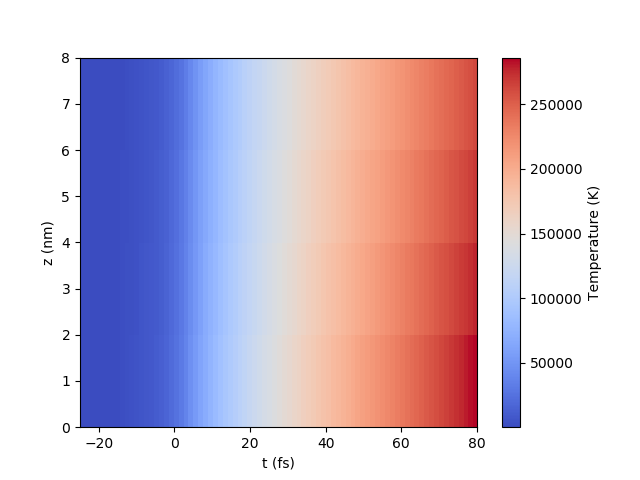

Text(0, 0.5, 'z (nm)')

In [14]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)
plt.colorbar(label = 'Temperature (K)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


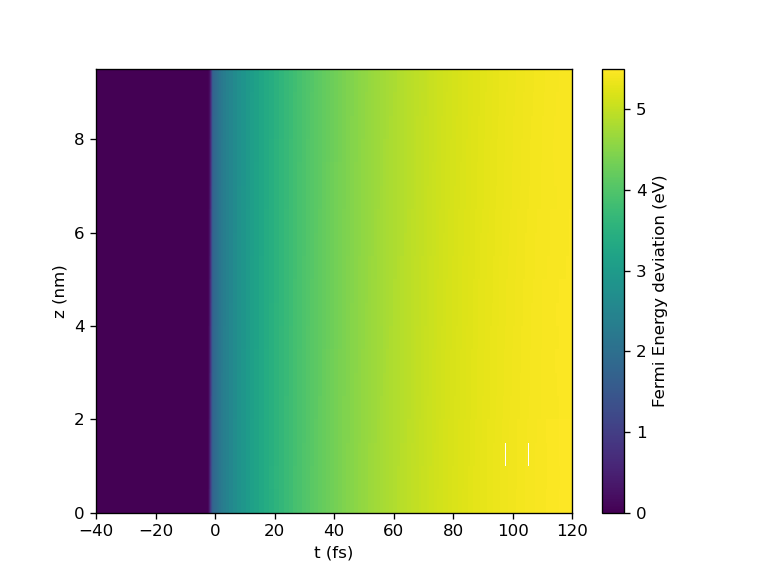

/tmp/ipykernel_186854/203480434.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)


Text(0, 0.5, 'z (nm)')

In [35]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)
plt.colorbar(label = 'Fermi Energy deviation (eV)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


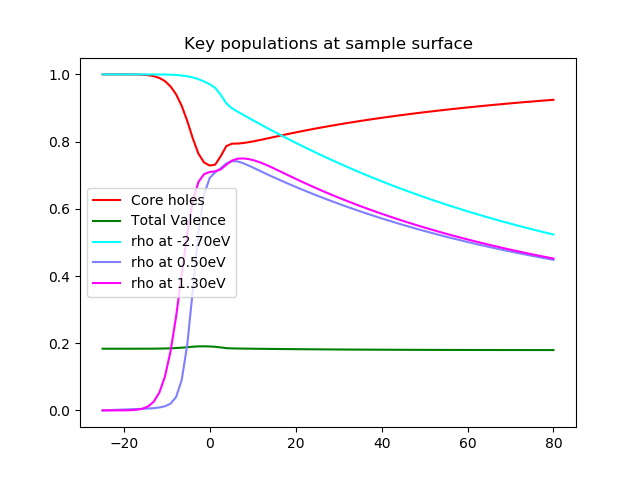

In [15]:
plt.figure()
plt.title('Key populations at sample surface')
plt.plot(sol.t,sol.core[0]/PAR.M_core, c='red', label = 'Core holes')
plt.plot(sol.t,(sol.R_VB[0])/PAR.M_VB, c='green',label = 'Total Valence')
cols = plt.cm.cool(np.linspace(0,1,PAR.N_photens))
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,sol.rho_j[0,PAR.resonant,:][iE].T/PAR.m_j[PAR.resonant][iE],c = cols[iE], label = f'rho at {E:.2f}eV')
plt.legend()


<IPython.core.display.Javascript object>


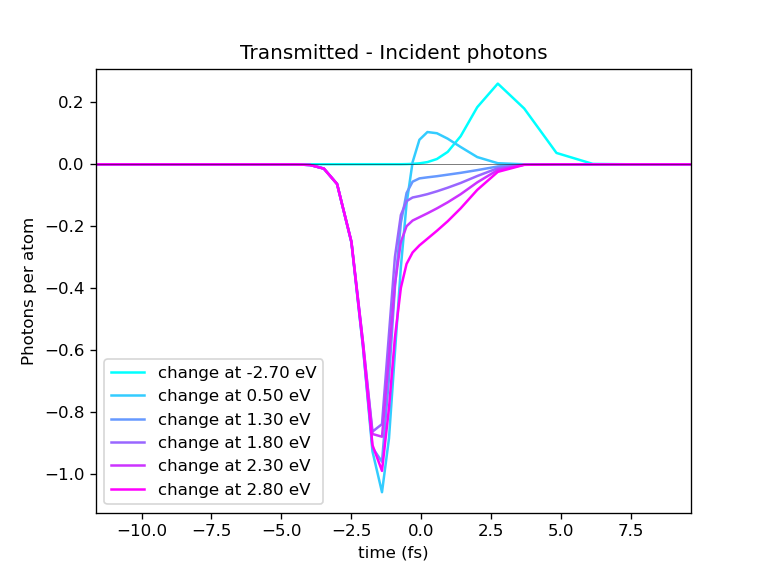

Text(0, 0.5, 'Photons per atom')

In [13]:
T = (sol.photon_densities[-1]-sol.photon_densities[0])#/np.max(sol.photon_densities[0],1)

plt.figure()
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,T[iE],c = cols[iE], label = f'change at {E:.2f} eV')
plt.axhline(c='k', lw = 0.3)
plt.legend()

plt.title('Transmitted - Incident photons')
plt.xlabel('time (fs)')
plt.ylabel('Photons per atom')

In [24]:
PAR.M_core

2

<IPython.core.display.Javascript object>


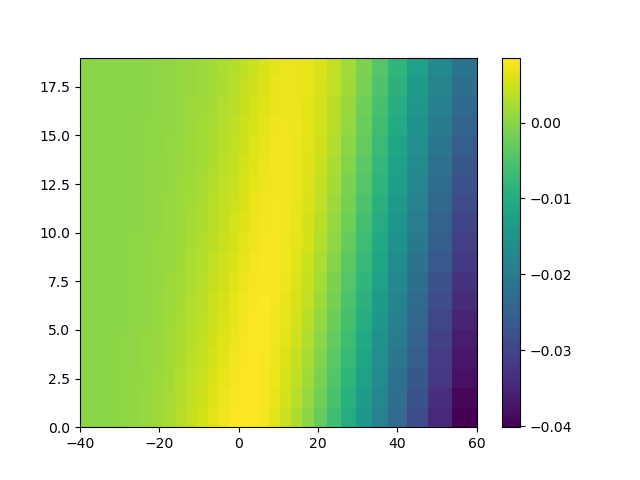

/tmp/ipykernel_121456/52012410.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)


In [34]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)
plt.colorbar()

In [21]:
sol.t.shape

(40,)

In [77]:
def make_valence_energy_axis(self, N_j: int, min=-6, finemax=10, max=50):
        """
        Creates an energy axis for the valence band, namely
            self.E_j
        and its edgepoints
            self.enax_j_edges
        Energies are relative to the fermi-level. 3/4 of all points fall into the range (min, finemax)
        Makes sure that the energies E_i correspond to a point in E_j and
        drops the closest points to keep the number N_j.
        :param N_j:
        :param min:
        :param finemax:
        :param max:
        :return:
        """
        N_j_fine = int(N_j * 3 / 4)
        N_j_coarse = int(N_j - N_j_fine)

        def fill_biggest_gap(pointlist):
            """
            This function takes a list of points and appends a point in the middle of the biggest gap
            """
            pointlist = np.array(np.sort(pointlist))
            gaps = pointlist[1:]-pointlist[:-1]
            biggest_gap_index = np.argsort(gaps)[-1]
            biggest_gap = gaps[biggest_gap_index]
            list_before = pointlist[:biggest_gap_index+1]
            new_value = pointlist[biggest_gap_index] + 0.5*biggest_gap
            list_after = pointlist[biggest_gap_index+1:]
            return np.concatenate((list_before, [new_value,], list_after))
        
        # The energies E_i and 0 must be in the axis
        enax_j_fine = [min, 0, finemax]+list(self.E_i[self.E_i<=finemax])
        # Fill up the gaps
        while len(enax_j_fine)<N_j_fine:
            enax_j_fine = fill_biggest_gap(enax_j_fine)
        
        dE = np.mean(enax_j_fine[1:]-enax_j_fine[:-1])
        #The same for the coarse part
        enax_j_coarse = [finemax+dE, max]+list(self.E_i[self.E_i>finemax])
        while len(enax_j_coarse)<N_j_coarse:
            enax_j_coarse = fill_biggest_gap(enax_j_coarse)
            
        enax_j = np.concatenate((enax_j_fine, enax_j_coarse))

        if not len(enax_j) == N_j:
            warnings.warn(
                'Energy Axis turned out longer or shorter than planned. What went wrong?')
            self.N_j = len(enax_j)
            
        def edgepoints(middles):
            """ Opposite of midpoints """
            edges = np.empty(middles.shape[0] + 1)
            edges[1:-1] = (middles[1:] + middles[:-1]) / 2
            edges[0] = middles[0] - (middles[1] - middles[0]) / 2
            edges[-1] = middles[-1] + (middles[-1] - middles[-2]) / 2
            return edges

        return enax_j, edgepoints(enax_j)

In [55]:
sim.plot_derivatives?

<IPython.core.display.Javascript object>


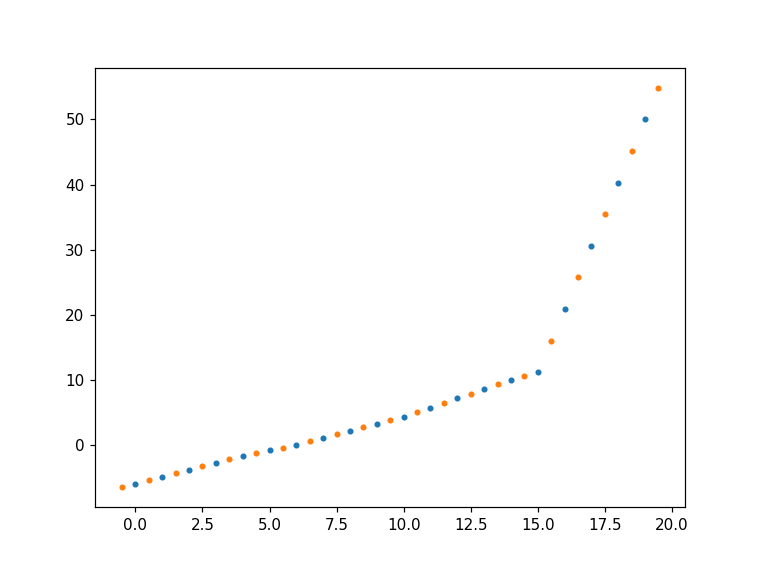

In [82]:
enax, enax_edges = make_valence_energy_axis(PAR, 20, min=-6, finemax=10, max=50)
plt.figure()
plt.plot(np.arange(len(enax)),enax,'.')
plt.plot(np.arange(len(enax_edges))-0.5,enax_edges,'.')